In [1]:
from keras.datasets import imdb
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

/Users/pengsongning/dp_ml/env/lib/python3.7/site-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Users/pengsongning/dp_ml/env/lib/python3.7/site-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [2]:
max([max(sequence) for sequence in train_data])

9999

In [3]:
word_index = imdb.get_word_index() #從imdb取得單字對應數字的字典 {'單字','數字'}
#word_index

In [4]:

new_word_index = dict(
[(value,key) for (key,value) in word_index.items()] #改變key格式{'數字','單字'}
)
#new_word_index

In [5]:
decoded = ' '.join(
[new_word_index.get(i-3 ,'') for i in train_data[0]]#把評論從數字轉英文 從i-3開始是因為
                                                    #imdb.load_data會自動將index+3因為0~2有其他用途
)

In [6]:
#decoded

In [7]:
#train_data,test_data #是兩層整數的list，要轉換成張量才能放到keras

In [8]:
#enumerate(train_data) # It allows us to loop over something and have an automatic counter. Here is an example:
my_list = ['apple', 'banana', 'grapes', 'pear']
for counter, value in enumerate(my_list):
    print (counter, value)

0 apple
1 banana
2 grapes
3 pear


In [9]:
#用One-hot encoding EX:If want to encode A~D ,then A is [1,0,0,0], B is [0,1,0,0] ... and if 'AC' is [1,0,1,0] 
import numpy as np
def vectorize_sequence(sequence,dimension=10000):
    results = np.zeros((len(sequence),dimension)) #create all zero array,and shape size is(len(sequence),dimension)
    for i, sequence in enumerate(sequence):
        results[i,sequence] = 1.
    return results
x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)


In [10]:
#train_labels,test_lables 也要向量化

In [11]:
y_train = np.asarray(train_labels).astype('float32') #asarray : Convert the input to an array without copy
y_test = np.asarray(test_labels).astype('float32')

In [12]:
#asarray vs array
arr1=np.ones((3,3)) # create all one array
arr2=np.array(arr1)
arr3=np.asarray(arr1)
arr1[1]=2
print(f"arr1 =\n {arr1}")
print(f"arr2 =\n {arr2}")
print(f"arr3 =\n {arr3}")

arr1 =
 [[1. 1. 1.]
 [2. 2. 2.]
 [1. 1. 1.]]
arr2 =
 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
arr3 =
 [[1. 1. 1.]
 [2. 2. 2.]
 [1. 1. 1.]]


In [86]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16,activation='relu', input_shape=(10000,)))#16單元隱藏層（輸入層 -> 需要input_shape）
model.add(layers.Dense(16,activation='relu'))#16單元隱藏層 input_shape會自動設定成上一層的輸出shape
model.add(layers.Dense(1,activation='sigmoid'))#1單元輸出層

### what is activation, and why it's so important

If there is no activation, then Dense can only be coposed by two linear operation (dot and sum).


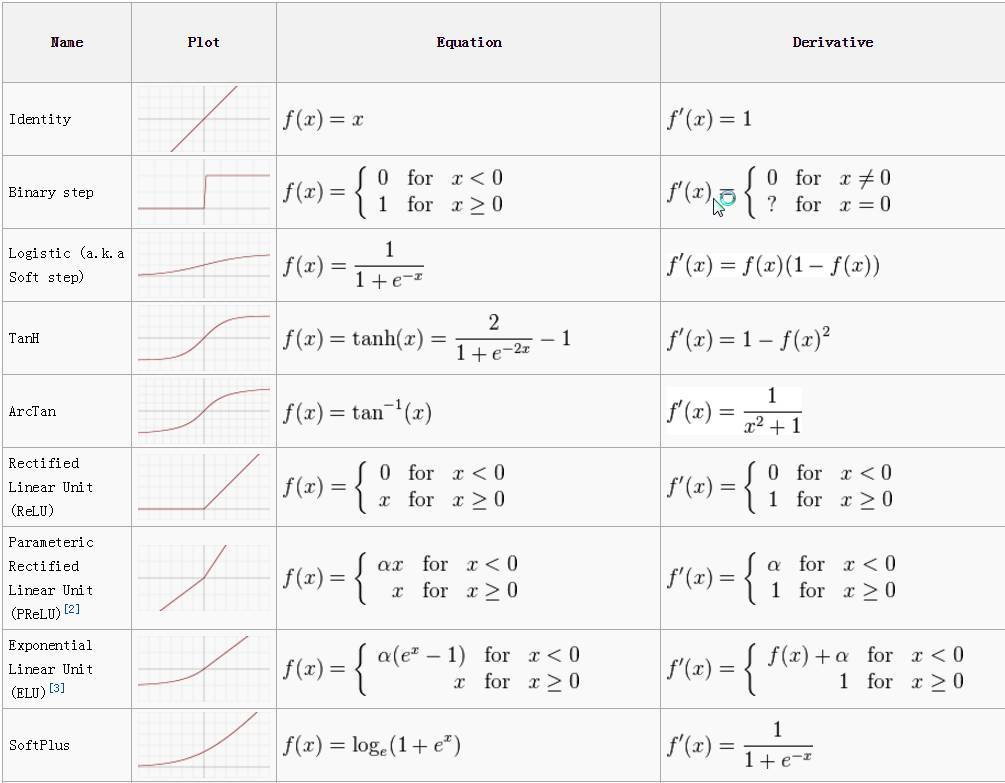

In [14]:
#多選擇使用relu的原因， 因為他比較不會造成梯度的消失，而梯度遞減是neural network最重要的東西
from IPython.display import Image
from IPython.core.display import HTML 
PATH = "activation.jpeg"                          #圖片路徑
Image(filename = PATH , width=850, height=600)

In [87]:
#compile model
model.compile(
    optimizer='rmsprop',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

### keras optimizer
參數clipnorm 和 clipvalue可以在所有optimizer中使用，用來控制梯度剪裁（Grandient clipping）

#### RMSprop

- keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
- lr: float >= 0. 學習率。
- rho: float >= 0. RMSProp梯度平方的移動均值的衰減率.
- epsilon: float >= 0. 模糊因子. 若為 None, 默認為 K.epsilon()。
- decay: float >= 0. 每次參數更新後學習率衰減值。

#### others
[官方說明](https://keras.io/api/optimizers/)

### keras loss
- binary_crossentropy 多用於2分類
$$ loss = \sum_{i=1}^n \hat{y_i} \log{y_i}+\left(1- \hat{y_i} \right) \log\left(1- \hat{y_i} \right)$$

- 只有兩者相等loss才會為零，而兩者相差越大loss差距幅度上升也越快

### keras metrics
- accuracy 是最基本的
- y_true为[0,1,2,3,4,5]，y_pred=[0, 1, 2, 4, 4, 4]，那模型的accuracy=4/6=66.67%。

In [88]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr = 0.001),
             loss = 'binary_crossentropy',
             metrics=['accuracy'])

In [89]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr = 0.001),
             loss = losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

In [90]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [91]:
model.compile(optimizer='rmsprop',
             loss = 'binary_crossentropy',
             metrics=['acc']) #建立訓練模型

#呼叫fit()開始訓練
history = model.fit(partial_x_train,#作為輸入資料
                   partial_y_train,#作為標籤
                   epochs=20,#20訓練週期
                   batch_size=512,#一次batch用512筆資料
                   validation_data=(x_val,y_val))

#!!驗證是在fit()中每一次訓練週期做完都驗證，不是全部train完再做。

Epoch 1/20
30/30 [==============================] - 2s 53ms/step - loss: 0.4894 - acc: 0.7931 - val_loss: 0.3593 - val_acc: 0.8744
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2780 - acc: 0.9077 - val_loss: 0.3266 - val_acc: 0.8631
Epoch 3/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1952 - acc: 0.9337 - val_loss: 0.2703 - val_acc: 0.8904
Epoch 4/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1471 - acc: 0.9500 - val_loss: 0.3195 - val_acc: 0.8758
Epoch 5/20
30/30 [==============================] - 1s 48ms/step - loss: 0.1148 - acc: 0.9622 - val_loss: 0.3039 - val_acc: 0.8846
Epoch 6/20
30/30 [==============================] - 1s 39ms/step - loss: 0.0902 - acc: 0.9714 - val_loss: 0.3358 - val_acc: 0.8792
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0701 - acc: 0.9781 - val_loss: 0.3737 - val_acc: 0.8746
Epoch 8/20
30/30 [==============================] - 1s 33ms/step - loss: 0.0532 - a

In [92]:
type(history.history)
history_dict = history.history

In [93]:
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

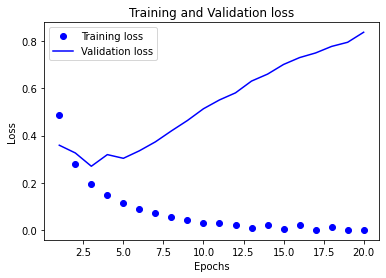

In [94]:
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_value = history_dict['val_loss']

epochs = range(1,len(loss_values)+1) #len(loss_values)=20，1~21不含21的週期
plt.plot(epochs,loss_values,'bo',label='Training loss')# x是週期,y是loss_values
plt.plot(epochs,val_loss_value,'b',label='Validation loss')

plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

#可以看到Validation loss在第四個週期左右到達最好，之後就開始快速上升，
#這就是所謂的overfitting

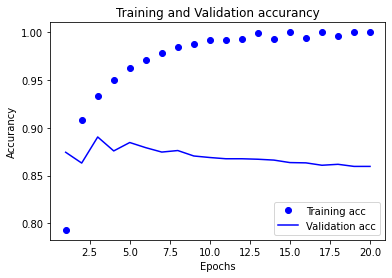

In [95]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs,acc,'bo',label = 'Training acc')
plt.plot(epochs,val_acc,'b',label = 'Validation acc')

plt.title('Training and Validation accurancy')
plt.xlabel('Epochs')
plt.ylabel('Accurancy')
plt.legend()

plt.show()

In [66]:
#嘗試看看增加Layer
model = models.Sequential()
model.add(layers.Dense(16,activation='relu', input_shape=(10000,)))#16單元隱藏層（輸入層 -> 需要input_shape）
model.add(layers.Dense(16,activation='relu'))#16單元隱藏層 input_shape會自動設定成上一層的輸出shape
model.add(layers.Dense(16,activation='relu'))#16單元隱藏層 input_shape會自動設定成上一層的輸出shape
model.add(layers.Dense(16,activation='relu'))#16單元隱藏層 input_shape會自動設定成上一層的輸出shape
model.add(layers.Dense(16,activation='relu'))#16單元隱藏層 input_shape會自動設定成上一層的輸出shape
model.add(layers.Dense(16,activation='relu'))#16單元隱藏層 input_shape會自動設定成上一層的輸出shape
model.add(layers.Dense(16,activation='relu'))#16單元隱藏層 input_shape會自動設定成上一層的輸出shape
model.add(layers.Dense(16,activation='relu'))#16單元隱藏層 input_shape會自動設定成上一層的輸出shape
model.add(layers.Dense(16,activation='relu'))#16單元隱藏層 input_shape會自動設定成上一層的輸出shape
model.add(layers.Dense(16,activation='relu'))#16單元隱藏層 input_shape會自動設定成上一層的輸出shape
model.add(layers.Dense(16,activation='relu'))#16單元隱藏層 input_shape會自動設定成上一層的輸出shape
model.add(layers.Dense(16,activation='relu'))#16單元隱藏層 input_shape會自動設定成上一層的輸出shape
model.add(layers.Dense(16,activation='relu'))#16單元隱藏層 input_shape會自動設定成上一層的輸出shape
model.add(layers.Dense(16,activation='relu'))#16單元隱藏層 input_shape會自動設定成上一層的輸出shape
model.add(layers.Dense(16,activation='relu'))#16單元隱藏層 input_shape會自動設定成上一層的輸出shape
model.add(layers.Dense(16,activation='relu'))#16單元隱藏層 input_shape會自動設定成上一層的輸出shape
model.add(layers.Dense(1,activation='sigmoid'))#1單元輸出層

model.compile(
    optimizer='rmsprop',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)
#呼叫fit()開始訓練
history_multilayer = model.fit(partial_x_train,#作為輸入資料
                   partial_y_train,#作為標籤
                   epochs=30,#30訓練週期
                   batch_size=512,#一次batch用512筆資料
                   validation_data=(x_val,y_val))


Epoch 1/30
30/30 [==============================] - 3s 100ms/step - loss: 0.6570 - accuracy: 0.6474 - val_loss: 0.5262 - val_accuracy: 0.8650
Epoch 2/30
30/30 [==============================] - 2s 52ms/step - loss: 0.4473 - accuracy: 0.8933 - val_loss: 0.4289 - val_accuracy: 0.8829
Epoch 3/30
30/30 [==============================] - 1s 47ms/step - loss: 0.2905 - accuracy: 0.9177 - val_loss: 0.4528 - val_accuracy: 0.8479
Epoch 4/30
30/30 [==============================] - 2s 51ms/step - loss: 0.1923 - accuracy: 0.9363 - val_loss: 0.3283 - val_accuracy: 0.8802
Epoch 5/30
30/30 [==============================] - 2s 52ms/step - loss: 0.1560 - accuracy: 0.9523 - val_loss: 0.3720 - val_accuracy: 0.8687
Epoch 6/30
30/30 [==============================] - 1s 49ms/step - loss: 0.1326 - accuracy: 0.9591 - val_loss: 0.3592 - val_accuracy: 0.8767
Epoch 7/30
30/30 [==============================] - 1s 31ms/step - loss: 0.1028 - accuracy: 0.9695 - val_loss: 0.4365 - val_accuracy: 0.8726
Epoch 8/30
3

In [71]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [67]:
#嘗試增加Neurons
model = models.Sequential()
model.add(layers.Dense(128,activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))#1單元輸出層

model.compile(
    optimizer='rmsprop',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)
#呼叫fit()開始訓練
history_multineurons= model.fit(partial_x_train,#作為輸入資料
                   partial_y_train,#作為標籤
                   epochs=30,#30訓練週期
                   batch_size=512,#一次batch用512筆資料
                   validation_data=(x_val,y_val))


Epoch 1/30
30/30 [==============================] - 2s 73ms/step - loss: 0.4807 - accuracy: 0.7688 - val_loss: 0.4288 - val_accuracy: 0.8057
Epoch 2/30
30/30 [==============================] - 2s 77ms/step - loss: 0.2467 - accuracy: 0.9077 - val_loss: 0.3145 - val_accuracy: 0.8722
Epoch 3/30
30/30 [==============================] - 2s 71ms/step - loss: 0.1749 - accuracy: 0.9345 - val_loss: 0.2921 - val_accuracy: 0.8834
Epoch 4/30
30/30 [==============================] - 2s 63ms/step - loss: 0.1379 - accuracy: 0.9502 - val_loss: 0.3455 - val_accuracy: 0.8711
Epoch 5/30
30/30 [==============================] - 2s 66ms/step - loss: 0.0640 - accuracy: 0.9829 - val_loss: 0.6261 - val_accuracy: 0.8234
Epoch 6/30
30/30 [==============================] - 2s 67ms/step - loss: 0.0609 - accuracy: 0.9808 - val_loss: 0.3773 - val_accuracy: 0.8716
Epoch 7/30
30/30 [==============================] - 2s 68ms/step - loss: 0.0166 - accuracy: 0.9975 - val_loss: 0.4730 - val_accuracy: 0.8787
Epoch 8/30
30

In [74]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [75]:
#比較總神經元數量一樣，但是一個多層但是每層較少神經元，一個少層但是每層多神經元
layer_dict = history_multilayer.history
layer_dict.keys()
neuron_dict = history_multineurons.history
neuron_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

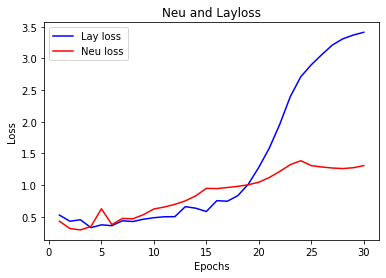

In [78]:
lay_val_loss_value = layer_dict['val_loss']
neu_val_loss_value = neuron_dict['val_loss']

epochs = range(1,len(lay_val_loss_value)+1) #len(loss_values)=20，1~21不含21的週期
plt.plot(epochs,lay_val_loss_value,'b',label='Lay loss')# x是週期,y是loss_values
plt.plot(epochs,neu_val_loss_value ,'r',label='Neu loss')

plt.title('Neu and Layloss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


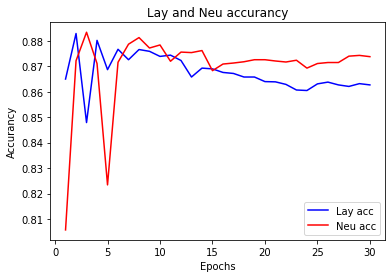

In [79]:
plt.clf()
lay_acc = layer_dict['val_accuracy']
neu_acc = neuron_dict['val_accuracy']
plt.plot(epochs,lay_acc,'b',label = 'Lay acc')
plt.plot(epochs,neu_acc,'r',label = 'Neu acc')

plt.title('Lay and Neu accurancy')
plt.xlabel('Epochs')
plt.ylabel('Accurancy')
plt.legend()

plt.show()